In [1]:
import random as rnd
import numpy as np
import math
import operator
import pandas as pd
from itertools import cycle
from enum import Enum
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from prettytable import PrettyTable

Функции и их производные для метода Брента:

In [2]:
def calculateFunc(number, x):
    if number == 1:
        return -5 * x ** 5 + 4 * x  ** 4 - 12 * x ** 3 + 11 * x ** 2 - 2 * x + 1 
    elif number == 2:
        return -3 * x * np.sin(0.75 * x) + np.exp(-2 * x)
    elif number == 3:
        return np.exp(3 * x) + 5 * np.exp(-2 * x)


def calculateDeriv(number, x):
    if number == 1:
        return -25 * x ** 4 + 16 * x ** 3 - 36 * x ** 2 + 22 * x - 2
    elif number == 2:
        return -2 * np.exp(-2 * x) - 3 * np.sin(0.75 * x) - 2.25 * x * np.cos(0.75 * x)
    elif number == 3:
        return np.exp(-2 * x) * (3 * np.exp(5 * x) - 10)


Метод Брендта с производной:

In [3]:
def calculateX_hat(x1, x2, f1, f2): # вычисление минимума методом секущей
    a = (f2 - f1) / (x2 - x1)
    b = f1 - x1 * a
    return - (b / a)


def brent(a, c, eps, func_index):
    x = w = v = (a + c) / 2
    f_x = f_w = f_v = calculateFunc(func_index, x)
    f_x_deriv = f_w_deriv = f_v_deriv = calculateDeriv(func_index, x)
    d = e = c - a
    counter = 0
    while True:
        counter += 1
        g, e = e, d     
        u = None
        if x != w and f_x_deriv != f_w_deriv:
            u = calculateX_hat(x, w, f_x_deriv, f_w_deriv)
            if u >= a + eps and u <= c - eps and abs(u - x) < g / 2:
                u = u
            else: 
                u = None
        u2 = None
        if x != v and f_x_deriv != f_v_deriv:
            u2 = calculateX_hat(x, v, f_x_deriv, f_v_deriv)
            if u2 >= a + eps and u2 <= c - eps and abs(u2 - x) < g / 2:
                if u is not None and abs(u2 -x) < abs(u - x):
                    u = u2
        if u is None:
            if f_x_deriv > 0:
                u = (a + x) / 2
            else:
                u = (x + c) / 2
        if abs(u - x) < eps:
            u = x + np.sign(u - x) * eps
        d = abs(x -u)
        f_u = calculateFunc(func_index, u)
        f_u_deriv = calculateDeriv(func_index, u)
        if f_u <= f_x:
            if u >= x:
                a = x
            else:
                c = x
            v, w, x = w, x, u 
            f_v, f_w, f_x = f_w, f_x, f_u
            f_v_deriv, f_w_deriv, f_x_deriv = f_w_deriv, f_x_deriv, f_u_deriv
        else:
            if u >= x:
                c = u
            else:
                a = u
            if f_u <= f_w or w == x:
                v, w = w, u 
                f_v, f_w = f_w, f_u
                f_v_deriv, f_w_deriv = f_w_deriv, f_u_deriv
            elif f_u <= f_v or v == x or v == w:
                v = u
                f_v = f_u
                f_v_deriv = f_u_deriv
        if counter != 1:
            if abs(prev_u - u) < eps:
                break
        prev_u = u
    return (c + a) / 2, counter

Точки минимума:

In [4]:
numbers = [1, 2, 3]
intervals = [[-0.5, 0.5], [0, np.pi * 2], [0, 1]]

table = PrettyTable()
table.field_names = ["function index", "Min X", "Min Y"]

for number, interval in zip(numbers, intervals):
    x, counter = brent(interval[0], interval[1], 0.0001, number)
    table.add_row([number, x, "%.10f" % calculateFunc(number, x)])
print(table.get_string())

+----------------+---------------------+---------------+
| function index |        Min X        |     Min Y     |
+----------------+---------------------+---------------+
|       1        | 0.05496520614587059 |  0.9213437886 |
|       2        |  2.9239871926399283 | -7.1252248733 |
|       3        |  0.2408960775171508 |  5.1483405806 |
+----------------+---------------------+---------------+


График зависимости количества итераций от точности

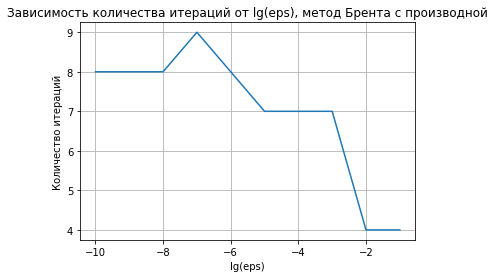

In [5]:
epss = np.linspace(1, 10, 10)
iterations = [brent(-0.5, 0.5, 10 ** -eps, 1)[1] for eps in epss]
plt.plot(np.log10(10 ** -epss), iterations)
plt.grid()
plt.ylabel("Количество итераций")
plt.xlabel("lg(eps)")
plt.title(f"Зависимость количества итераций от lg(eps), метод Брента с производной")
plt.show()

Функции и их частные производные:

In [6]:
def f1(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2


def f1_deriv(x, index):
    return {
        1: 2 * (200 * x[0] ** 3 - 200 * x[0] * x[1] + x[0] - 1),
        2: 200 * (x[1] - x[0] ** 2)
    }.get(index)


def f2(x):
    return (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2


def f2_deriv(x, index):
    return {
        1: 2 * (2 * x[0] ** 3 - 2 * x[0] * x[1] + x[0] - 1),
        2: 2 * (x[1] - x[0] ** 2)
    }.get(index)


def f3(x):
    return (1.5 - x[0] * (1 - x[1])) ** 2 + (2.25 - x[0] * (1 - x[1] ** 2)) ** 2 + (2.625 - x[0] * (1 - x[1] ** 3)) ** 2


def f3_deriv(x, index):
    return {
        1: 2 * x[0] * (
                x[1] ** 6 + x[1] ** 4 - 2 * x[1] ** 3 - x[1] ** 2 - 2 * x[1] + 3) + 5.25 * x[1] ** 3 + 4.5 * x[1] ** 2 + 3 * x[1] - 12.75,
        2: x[0] * (x[0] * (6 * x[1] ** 5 + 4 * x[1] ** 3 - 6 * x[1] ** 2 - 2 * x[1] - 2) + 15.75 * x[1] ** 2 + 9 * x[1] + 3)
    }.get(index)


def f4(x):
    return (x[0] + x[1]) ** 2 + 5 * (x[2] - x[3]) ** 2 + (x[1] - 2 * x[2]) ** 4 + 10 * (x[0] - x[3]) ** 4


def f4_deriv(x, index):
    return {
        1: 2 * (20 * (x[0] - x[3]) ** 3 + x[0] + x[1]),
        2: 2 * (x[0] + 2 * (x[1] - 2 * x[2]) ** 3 + x[1]),
        3: 10 * (x[2] - x[3]) - 8 * (x[1] - 2 * x[2]) ** 3,
        4: 10 * (-4 * (x[0] - x[3]) ** 3 + x[3] - x[2])
    }.get(index)


def getFunc(index):
    return {1: f1,
            2: f2,
            3: f3,
            4: f4
            }.get(index)


def getFuncDeriv(index):
    return {1: f1_deriv,
            2: f2_deriv,
            3: f3_deriv,
            4: f4_deriv
            }.get(index)

def getFuncVariableNumber(index):
    return {1: 2,
            2: 2,
            3: 2,
            4: 4}.get(index)

def getBounds(index):
    return {1: (-1.0, 1.0),
            2: (-1.0, 1.0),
            3: (-3.0, 3.0),
            4: (-1.0, 1.0)}.get(index)

def initialApprox(index):
    return {1: [-1.0, -1.0],
            2: [-1.0, -1.0],
            3: [-1.0, -1.0],
            4: [-1.0, -1.0, -1.0, -1.0]}.get(index)

def initialApproxForRavine(index):
    return {1: ([0.5, 0.5], [0.45, 0.4]),
            2: ([0.5, 0.5], [0.45, 0.4]),
            3: ([0.5, 0.5], [0.45, 0.4]),
            4: ([0.5, 0.5, 0.5, 0.5], [0.45, 0.4, 0.5, 0.5])}.get(index)

def writeRow(data, function_index, X, Y):
    data['function_index'].append(function_index)
    data['min_X'].append(X)
    data['min_Y'].append(Y)

Метод покоординатного спуска:

In [7]:
def coordinateDescent(x, func_number, eps, max_iter, learning_rate):
    coordinates = []  # отрезки для графика
    n_arg = len(x)
    cycler = cycle([i + 1 for i in range(n_arg)])  # чередование координат по кругу
    counter = 0
    while True:
        counter += 1
        index = next(cycler)
        d_x = getFuncDeriv(func_number)(x, index)
        new_x = x.copy()
        new_x[index - 1] = x[index - 1] - learning_rate * d_x
        coordinates.append([x, new_x])
        if np.linalg.norm(np.array(new_x) - np.array(x)) < eps:
            x = new_x
            break
        x = new_x
    return x, counter, coordinates

Точки минимума:

In [8]:
table = PrettyTable()
table.field_names = ["function index", "Min X", "Min Y"]
for i in range (1, 5):
    x, counter, coordinates = coordinateDescent(initialApprox(i), i, 0.00001, 5000, 0.002)
    table.add_row([i, x, "%.10f" % getFunc(i)(x)])
print(table.get_string())

+----------------+-----------------------------------------------------------------------------------------+--------------+
| function index |                                          Min X                                          |    Min Y     |
+----------------+-----------------------------------------------------------------------------------------+--------------+
|       1        |                         [0.9916018803127457, 0.9832246738689623]                        | 0.0000707746 |
|       2        |                         [0.9857494733215217, 0.9657169023594465]                        | 0.0002388992 |
|       3        |                         [2.942611788998212, 0.48532113286360684]                        | 0.0005624514 |
|       4        | [0.004025720148638469, -0.03111473748208406, -0.1034964352913069, -0.10313349291246848] | 0.0030099464 |
+----------------+-----------------------------------------------------------------------------------------+--------------+


Графики:

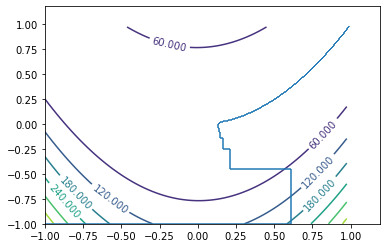

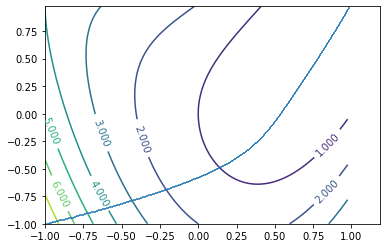

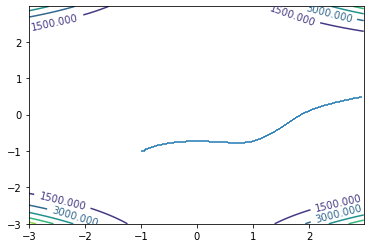

In [9]:
for i in range(1, 4):
    delta = 0.025
    bounds = getBounds(i)
    x = np.arange(bounds[0], bounds[1], delta)
    y = np.arange(bounds[0], bounds[1], delta)
    X, Y = np.meshgrid(x, y)
    Z = getFunc(i)([X, Y])
    fig, ax = plt.subplots()
    cs = ax.contour(X,Y,Z)
    ax.clabel(cs)
    x, counter, coordinates = coordinateDescent(initialApprox(i), i, 0.00001, 5000, 0.002)
    lc = LineCollection(coordinates, lineWidths=1.5)
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)

График зависимости количества итераций от выбранной точности:

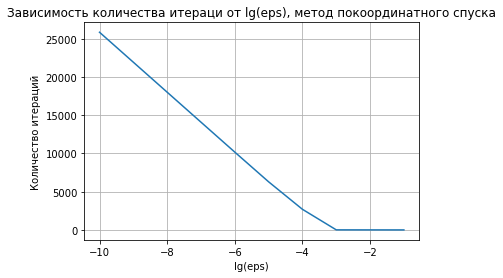

In [10]:
epss = np.linspace(1, 10, 10)
iterations = []
for eps in epss:
    x, counter, coordinates =  coordinateDescent([-1.0, -1.0], 1, 10**-eps, 5000, 0.002)
    iterations.append(counter)
plt.plot(np.log10(10 ** -epss), iterations)
plt.grid()
plt.ylabel("Количество итераций")
plt.xlabel("lg(eps)")
plt.title(f"Зависимость количества итераци от lg(eps), метод покоординатного спуска")
plt.show()

Метод наискорейшего спуска:

In [11]:
def goldenRatio(a, b, func, eps): # метод золотого сечения для определения шага
    PHI = (1 + np.sqrt(5)) / 2
    len_prev = 0
    x1 = b - (b - a) / PHI
    x2 = a + (b - a) / PHI
    f1 = func(x1)
    f2 = func(x2)
    counter = 0
    while abs(b - a) > eps: 
        counter += 1
        len_prev = b - a
        if f1 < f2:
            b = x2
            f2, x2 = f1, x1
            x1 = b - (b - a) / PHI
            f1 = func(x1)
        else:
            a = x1
            f1, x1 = f2, x2
            x2 = a + (b - a) / PHI
            f2 = func(x2)
    return (a + b) / 2

In [12]:
def steepestDescent(func_index, eps):
    func = getFunc(func_index)
    func_deriv = getFuncDeriv(func_index)
    variable_number = getFuncVariableNumber(func_index)
    x = [2 for i in range(variable_number)]
    points = [(x, func(x))]
    coordinates = []
    counter = 0
    while True:
      counter += 1
      grad = [func_deriv(x, i) for i in range(1, variable_number + 1)]
      new_x_func = lambda step: list(map(operator.sub, x, [step * grad[i] for i in range(len(grad))]))
      step_func = lambda step: func(new_x_func(step))
      result_step = goldenRatio(0, 10, step_func, 10 ** -5)
      new_x = new_x_func(result_step)
      coordinates.append([x, new_x])
      x = new_x
      points.append((x, func(x)))
      if abs(points[-1][1] - points[-2][1]) < eps:
        break;
    return coordinates, points, counter

Точки минимума:

In [13]:
table = PrettyTable()
table.field_names = ["function index", "Min X", "Min Y"]
for i in range (1, 5):
    coordinates, points, counter = steepestDescent(i, 10 ** -9)
    table.add_row([i, points[-1][0], "%.15f" % points[-1][1]])
print(table.get_string())

+----------------+---------------------------------------------------------------------------------------------+-------------------+
| function index |                                            Min X                                            |       Min Y       |
+----------------+---------------------------------------------------------------------------------------------+-------------------+
|       1        |                           [0.9992643225982748, 0.9985272473861031]                          | 0.000000541597224 |
|       2        |                           [1.000025711534006, 1.0000413689003973]                           | 0.000000000762183 |
|       3        |                           [2.999558859930697, 0.4998916127988598]                           | 0.000000031187891 |
|       4        | [0.00034784018729338304, -0.0003268955644943773, 0.01062101303280612, 0.010612429356688621] | 0.000000328246286 |
+----------------+---------------------------------------------------

Графики:

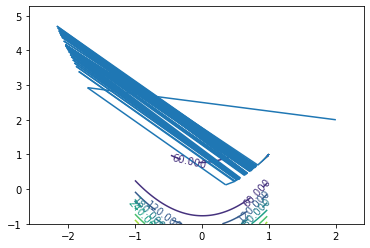

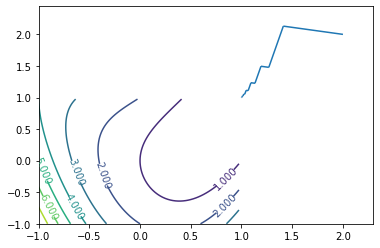

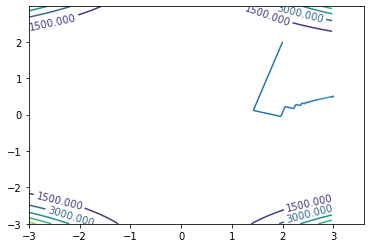

In [14]:
for i in range(1, 4):
    delta = 0.025
    bounds = getBounds(i)
    x = np.arange(bounds[0], bounds[1], delta)
    y = np.arange(bounds[0], bounds[1], delta)
    X, Y = np.meshgrid(x, y)
    Z = getFunc(i)([X, Y])
    fig, ax = plt.subplots()
    cs = ax.contour(X,Y,Z)
    ax.clabel(cs)
    coordinates, points, counter = steepestDescent(i, 10 ** -9)
    lc = LineCollection(coordinates, lineWidths=1.5)
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)

График зависимости количества итераций от выбранной точности:

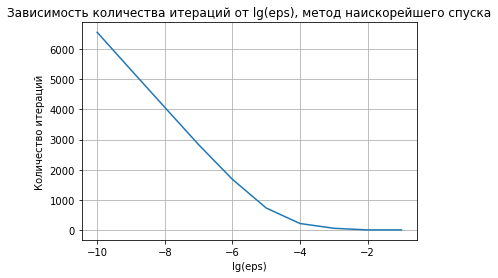

In [15]:
iterations = []
for eps in epss:
    coordinates, points, counter =  steepestDescent(1, 10**-eps)
    iterations.append(counter)
plt.plot(np.log10(10 ** -epss), iterations)
plt.grid()
plt.ylabel("Количество итераций")
plt.xlabel("lg(eps)")
plt.title(f"Зависимость количества итераций от lg(eps), метод наискорейшего спуска")
plt.show()

Метод проекционного градиента:

In [16]:
class ProjectionSurface(Enum):
    SIMPLEX = 1
    SPHERE = 2
    BALL = 3


class Projection:
    def __init__(self):
        pass

    def theta(self, vector_struct, z):
        pass


class ProjectionWorker:
    __slots__ = ['project_type','projector', 'eps', 'vector_struct', 'z']

    def __init__(self, vector_struct, z, project_type: ProjectionSurface):
        self.vector_struct = vector_struct
        self.z = z
        self.project_type = project_type
        self.eps = 1e-6

    def update(self, vector_struct):
        pass

    def project(self):
        pass

In [17]:
class ProjectionLinear(Projection):
    def __init__(self):
        super().__init__()

    def theta(self, vector, z):
        N = len(vector)
        U = [i for i in range(N)]
        s = 0
        rho = 0
        iter = 0
        while len(U) > 0:
            iter += 1
            lenU = len(U)
            i = 0
            j = 0
            G = [-1] * lenU
            L = G[:]

            k0 = rnd.randint(0, lenU - 1)
            k = U[k0]
            ds = 0

            for m in U:
                iter += 1
                if m == k:
                    ds += vector[m]
                elif vector[m] >= vector[k]:
                    G[i] = m
                    ds += vector[m]
                    i += 1
                else:
                    L[j] = m
                    j += 1
            drho = i + 1
            if (s + ds) - (rho + drho) * vector[k] < z:
                s += ds
                rho += drho
                U = L[:j]
            else:
                U = G[:i]
        if rho == 0:
            print('Debug point')
            return None
        return (s - z) / rho

In [18]:
class LinearWorker(ProjectionWorker):
    def __init__(self, vector_struct, z, project_type: ProjectionSurface):
        super().__init__(vector_struct=vector_struct, z = z, project_type=project_type)
        self.projector = ProjectionLinear()

    def update(self, vector_struct):
        self.vector_struct = np.array(vector_struct)

    def project(self):
        N = len(self.vector_struct)
        if self.project_type in (ProjectionSurface.BALL, ProjectionSurface.SPHERE):
            v_abs = list(map(abs, self.vector_struct))
        else:
            v_abs = self.vector_struct
        v_norm = sum(v_abs)
        if self.project_type is ProjectionSurface.BALL and v_norm <= self.z + self.eps:
            return self.vector_struct
        if self.project_type is ProjectionSurface.SPHERE and abs(v_norm - self.z) < self.eps:
            return self.vector_struct
        theta = self.projector.theta(v_abs, self.z)
        if theta is None:
            print('Error while making linear projection!!!')
            return None
        w = [0] * N
        if self.project_type in (ProjectionSurface.SPHERE, ProjectionSurface.BALL):
            for i in range(N):
                w[i] = max(v_abs[i] - theta, 0) if self.vector_struct[i] >= 0 else -max(v_abs[i] - theta, 0)
        else:
            for i in range(N):
                w[i] = max(v_abs[i] - theta, 0)
        return np.array(w)

In [19]:
def steepestDescentWithGradientProjection(func_index, eps):
    func = getFunc(func_index)
    func_deriv = getFuncDeriv(func_index)
    variable_number = getFuncVariableNumber(func_index)
    x = [0 for i in range(variable_number)]
    points = [(x, func(x))]
    coordinates = []
    counter = 0
    while True:
        counter += 1
        grad = [func_deriv(x, i) for i in range(1, variable_number + 1)]
        new_x_func = lambda step: list(map(operator.sub, x, [step * grad[i] for i in range(len(grad))]))
        step_func = lambda step: func(new_x_func(step))
        result_step = goldenRatio(0, 10, step_func, 10 ** -5)
        pr = LinearWorker(new_x_func(result_step), getFuncVariableNumber(func_index) + 2, ProjectionSurface.BALL)
        new_x = pr.project()
        coordinates.append([x, new_x])
        x = new_x
        points.append((x, func(x)))
        if abs(points[-1][1] - points[-2][1]) < eps:
            break
    return coordinates, points, counter

Точки минимума:

In [20]:
table = PrettyTable()
table.field_names = ["function index", "Min X", "Min Y"]
for i in range (1, 5):
    coordinates, points, counter = steepestDescentWithGradientProjection(i, 10 ** -9)
    table.add_row([i, points[-1][0], "%.15f" % points[-1][1]])
print(table.get_string())

+----------------+------------------------------------------+-------------------+
| function index |                  Min X                   |       Min Y       |
+----------------+------------------------------------------+-------------------+
|       1        | [0.9992347571018709, 0.9984690083860343] | 0.000000585715812 |
|       2        | [0.9999429231122239, 0.9998858590718154] | 0.000000003257771 |
|       3        | [2.9997767242282567, 0.499938420662227]  | 0.000000008870195 |
|       4        |           [0.0, 0.0, 0.0, 0.0]           | 0.000000000000000 |
+----------------+------------------------------------------+-------------------+


Графики:

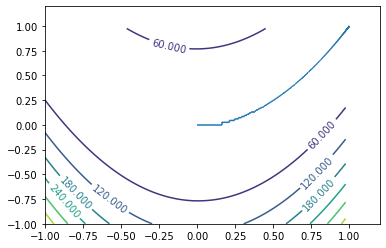

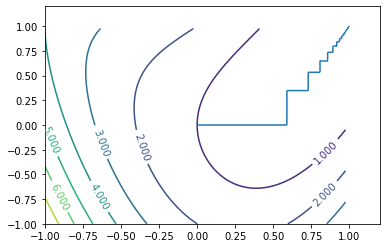

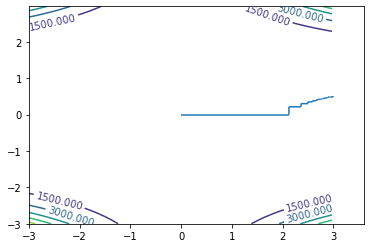

In [21]:
for i in range(1, 4):
    delta = 0.025
    bounds = getBounds(i)
    x = np.arange(bounds[0], bounds[1], delta)
    y = np.arange(bounds[0], bounds[1], delta)
    X, Y = np.meshgrid(x, y)
    Z = getFunc(i)([X, Y])
    fig, ax = plt.subplots()
    cs = ax.contour(X,Y,Z)
    ax.clabel(cs)
    coordinates, points, counter = steepestDescentWithGradientProjection(i, 10 ** -9)
    lc = LineCollection(coordinates, lineWidths=1.5)
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)

График зависимости количества итераций от выбранной точности:

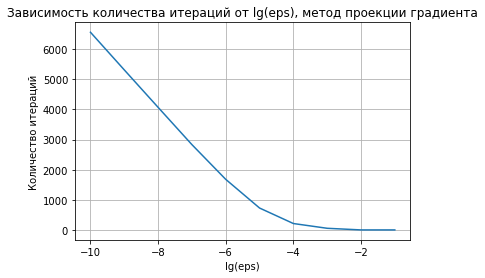

In [22]:
iterations = []
for eps in epss:
    coordinates, points, counter = steepestDescent(1, 10**-eps)
    iterations.append(counter)
plt.plot(np.log10(10 ** -epss), iterations)
plt.grid()
plt.ylabel("Количество итераций")
plt.xlabel("lg(eps)")
plt.title(f"Зависимость количества итераций от lg(eps), метод проекции градиента")
plt.show()

Метод овражного градиента:

In [23]:
def step(v, func_number, h):
    x = []
    for i in range(len(v)):
        x.append(v[i] - 0.002 * getFuncDeriv(func_number)(v, i + 1))
    return np.array(x)

In [24]:
def ravineGradient(v_k, v_k_1, func_number, eps, C, h, max_iter):
    coordinates = []
    v_k = np.array(v_k)
    v_k_1 = np.array(v_k_1)
    x_k = step(v_k, func_number, h)
    x_k_1 = step(v_k_1, func_number, h)
    counter = 0
    while counter < max_iter:
        coordinates.append([x_k, x_k_1])
        counter += 1
        v_new = x_k_1 - (x_k_1 - x_k) / (np.linalg.norm(x_k_1 - x_k)) \
                * h * np.sign(np.array(getFunc(func_number)(x_k_1) - np.array(getFunc(func_number)(x_k))))
        x_new = step(v_new, func_number, h)
        cos_a = (np.dot(v_new - x_k_1, x_new - x_k_1)) / (
                np.linalg.norm(v_new - x_k_1) * (np.linalg.norm(x_new - x_k_1)))
        cos_a_1 = (np.dot(v_k_1 - x_k, x_k_1 - x_k)) / (np.linalg.norm(v_k_1 - x_k) * (np.linalg.norm(x_k_1 - x_k)))
        h = h * C ** (cos_a - cos_a_1)
        v_k = v_k_1
        v_k_1 = v_new
        x_k = x_k_1
        x_k_1 = x_new
        if np.linalg.norm(np.array(x_k_1) - np.array(x_k)) < eps:
            break
        if abs(getFunc(func_number)(x_k_1) - getFunc(func_number)(x_k)) < eps:
            break
    return x_k_1, counter, coordinates

Точки минимума:

In [25]:
table = PrettyTable()
table.field_names = ["function index", "Min X", "Min Y"]
for i in range (1, 5):
    initialApprox = initialApproxForRavine(i)
    x, counter, coordinates = ravineGradient(initialApprox[0], initialApprox[1], i, 0.000001, 5, 0.0001, 5000)
    table.add_row([i, x, "%.15f" % getFunc(i)(x)])
print(table.get_string())

+----------------+-----------------------------------------------+-------------------+
| function index |                     Min X                     |       Min Y       |
+----------------+-----------------------------------------------+-------------------+
|       1        |            [0.97586838 0.95242845]            | 0.000583530609104 |
|       2        |            [0.990578   0.97731497]            | 0.000104217453285 |
|       3        |            [2.97418633 0.49348393]            | 0.000109820079649 |
|       4        | [0.0001728  0.00212527 0.04922003 0.04934129] | 0.000149853844128 |
+----------------+-----------------------------------------------+-------------------+


Графики:

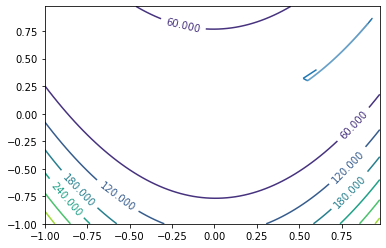

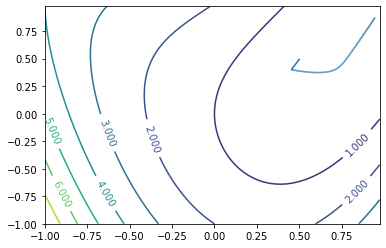

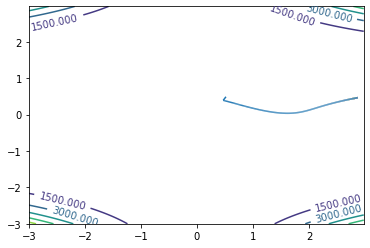

In [26]:
for i in range(1, 4):
    delta = 0.025
    bounds = getBounds(i)
    x = np.arange(bounds[0], bounds[1], delta)
    y = np.arange(bounds[0], bounds[1], delta)
    X, Y = np.meshgrid(x, y)
    Z = getFunc(i)([X, Y])
    fig, ax = plt.subplots()
    cs = ax.contour(X,Y,Z)
    ax.clabel(cs)
    initialApprox = initialApproxForRavine(i)
    x, counter, coordinates = ravineGradient(initialApprox[0], initialApprox[1], i, 0.00001, 3, 0.0001, 5000)
    lc = LineCollection(coordinates, lineWidths=1.5)
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)

График зависимости количества итераций от выбранной точности:

[0.54496299 0.30215157]
[0.54903626 0.30008451]
[0.55025387 0.30063144]
[0.79862318 0.63689241]
[0.93479903 0.87357417]
[0.9760119  0.95244313]
[0.99216896 0.98442177]
[0.99706852 0.99426006]
[0.9976816  0.99553295]
[0.99772946 0.995634  ]


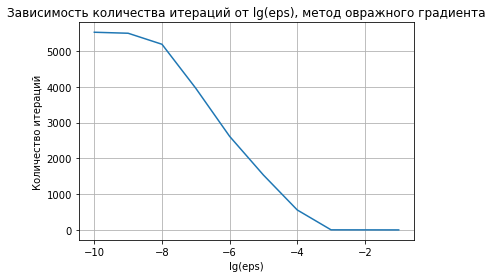

In [27]:
iterations = []
for eps in epss:
    x, counter, coordinates = ravineGradient(initialApprox[0], initialApprox[1], 1, 10 ** -eps, 10, 0.00002, 10000)
    print(x)
    iterations.append(counter)
plt.plot(np.log10(10 ** -epss), iterations)
plt.grid()
plt.ylabel("Количество итераций")
plt.xlabel("lg(eps)")
plt.title(f"Зависимость количества итераций от lg(eps), метод овражного градиента")
plt.show()

Выводы:

Метод Брента с производной в среднем работает за вдвое меньшее число итераций, чем версия без производной. Однако на каждой итерации он делает два обращения к оракулу вместо одного у обычной версии. Таким образом их эффективность примерно одинакова. Основным недостатком является то, что метод нельзя использовать на функциях с более чем одним аргументом.

По графикам покоординатного метода становится очевидно, что отрезки релаксационной последовательности параллельны осям координат. Это хорошо заметно на графике для первой функции.

Покоординатный метод требует значительно больше итераций чем метод наискорейшего спуска. При этом на каждой итерации он обращается к оракулу для вычисления лишь одной производной, в то время как наискорейший метод вычисляет полный градиент и к тому же дополнительно обращается к оракулу для вычисления шага. Таким образом покоординатный метод является более экономным к ресурсам, но при этом медленнее сходится.

Метод проекции градиента работает за такое же число итераций и число обращений к оракулу, как и метод наискорейшего спуска. Это связано с тем, что проекционный градиент является надстройкой над градиентным спуском, которая не влияет на эффективность для большинства функций. Однако метод проекции градиента помогает нам в случае, когда множество X отлично от E^n.

Благодаря изменяющейся длине шага, которую мы настраиваем на каждой итерации, метод овражного градиента сходится быстрее других.